\newpage

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

Question 1

This dataset presents a classification problem that is used to predict whether a patient has heart disease. The response variable num indicates the severity of heart disease and ranges from 0-4, which we convert to a binary result, which is the presence or absence of heart disease. Our goal is to build a model that classifies patients as "heart disease" (1) or "no heart disease" (0) based on 13 clinical characteristics. This binary classification allows us to identify high-risk patients based on clinical measurements.

In [8]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [9]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

Question 2

In [10]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_cols:
	df[col] = df[col].astype('category')
	numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,2
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


Question 3

In [11]:
print("Total observations:", df.shape[0])

Total observations: 303


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    category
 12  thal      301 non-null    category
 13  num       303 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 17.8 KB
None


In [13]:
print(df.describe())

                age      trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.465641e-18  4.426236e-16  2.345026e-16 -1.172513e-16  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -2.145037e+00 -2.334877e+00 -3.442067e+00 -8.968617e-01   
25%   -7.135564e-01 -6.652997e-01 -6.905030e-01 -7.053073e-01 -8.968617e-01   
50%    1.729945e-01 -9.616980e-02 -1.101357e-01  1.485618e-01 -2.067053e-01   
75%    7.270888e-01  4.729601e-01  5.476139e-01  7.178079e-01  4.834512e-01   
max    2.500191e+00  3.887739e+00  6.138485e+00  2.294182e+00  4.451851e+00   

              num  
count  303.000000  
mean     0.937294  
std      1.228536  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      2.000000  
max      4.000000  


In [14]:
print("Unique values per column:\n", df.nunique())

Unique values per column:
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


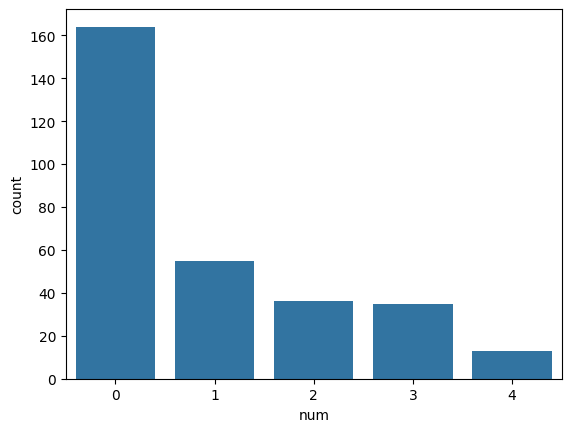

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [15]:
sns.countplot(x="num", data=df)
plt.show()
print(df['num'].value_counts())

Dataset Description: The heart disease dataset contains 303 observations and 14 variables (13 predictors + 1 target). Key details about the data include:

There are 13 predictor features capturing patient information:

5 numerical features: `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.

8 categorical features: `sex` (0 = female, 1 = male), `cp` (chest pain type with 4 categories), `fbs` (fasting blood sugar > 120 mg/dl, binary), `restecg` (resting ECG results, 3 categories), `exang` (exercise-induced angina, binary), `slope` (slope of ST segment, 3 categories), `ca` (number of major vessels colored by fluoroscopy, 0–3, with some missing values), and `thal` (thalassemia defect type, 3 categories, with some missing).

The **target variable** `num` indicates heart disease diagnosis (0 = no disease, 1–4 = levels of disease). We will transform this to binary in the next step. The most of target variable num sperade in 0, and need to transform to binary since the range is 0-4.

There are a few missing values present in `ca` and `thal` features (4 missing in `ca`, 2 in `thal`). Aside from these, all columns are complete. Overall, the dataset is suitable for supervised learning, with a mix of feature types and a binary outcome.

Question 4

In [16]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

print("Value counts for 'num' after transformation:")
print(df['num'].value_counts())

Value counts for 'num' after transformation:
num
0    164
1    139
Name: count, dtype: int64


Question 5

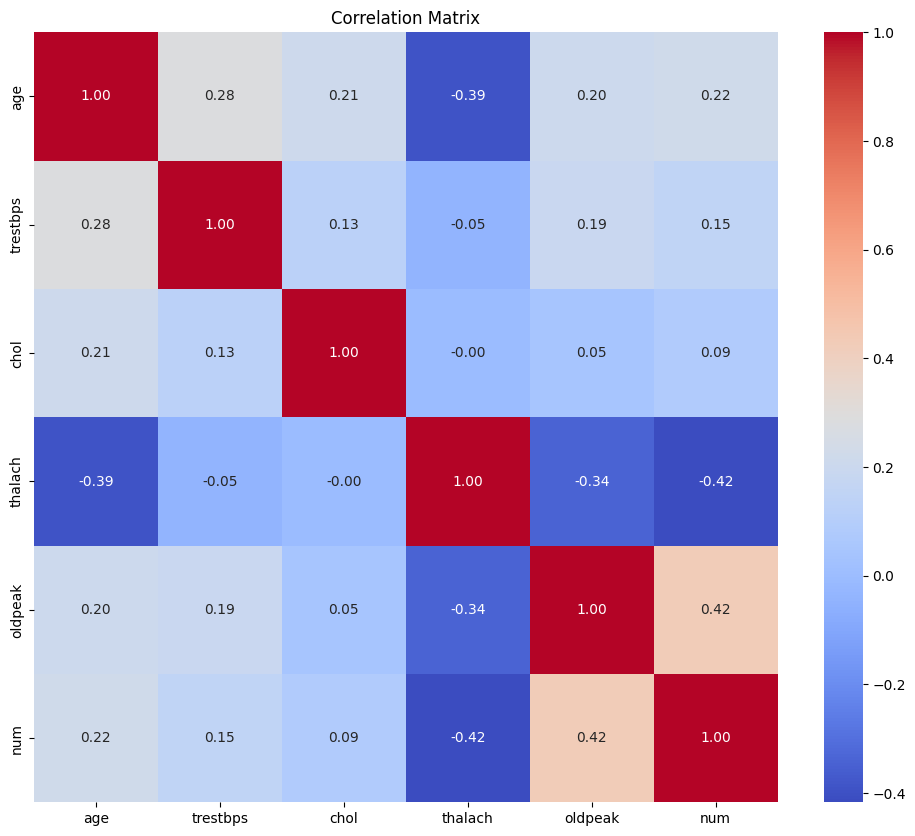

In [17]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
corr = df[numerical_cols + ['num']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The variable `thalach` and `oldpeak` all show significant positive relationships with the presence of heart disease. These variables are likely to contribute meaningful information and should be prioritized during feature selection.

In contrast, variables such as `chol` (serum cholesterol) show very weak correlations with the `target`, indicating they may be less useful for classification and could potentially be excluded to reduce model complexity without sacrificing performance.

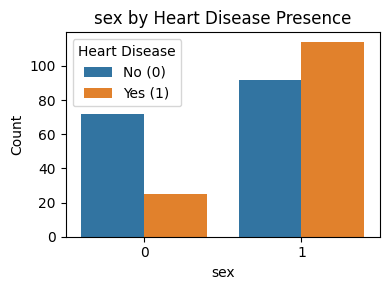

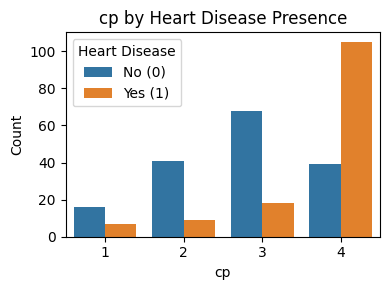

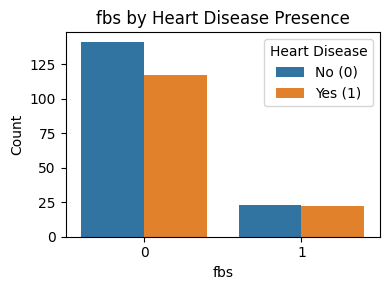

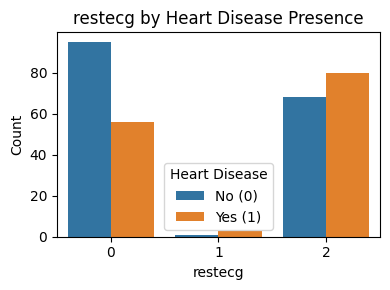

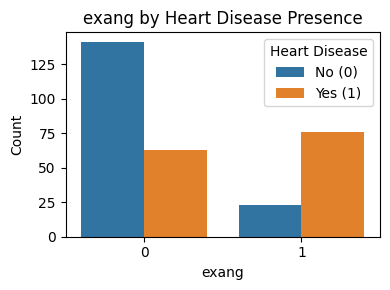

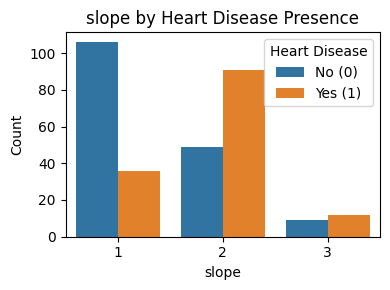

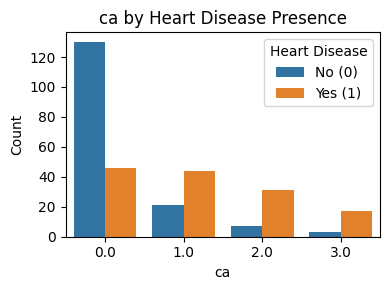

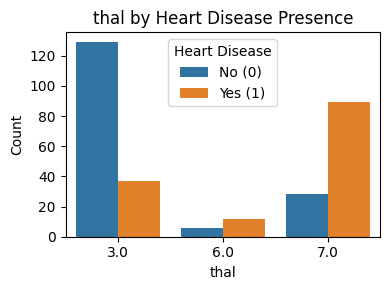

In [18]:
X = df.drop('num', axis=1)
y = df['num']

categorical_feats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_feats:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, hue=y, data=df)
    plt.title(f"{col} by Heart Disease Presence")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease", labels=["No (0)","Yes (1)"])
    plt.tight_layout()
    plt.show()

sex: Males (sex = 1) are more likely to have heart disease than females, as seen by the higher count of diseased males.

cp: Patients with chest pain type 4 (asymptomatic) have a strong association with heart disease, while types 2 and 3 are more common in healthy individuals.

fbs: Fasting blood sugar (fbs) appears to have little impact on heart disease, as both 0 and 1 show similar distributions across disease status.

restecg: A normal ECG (restecg = 0) is more common in healthy individuals, while restecg = 2 (left ventricular hypertrophy) is slightly more frequent among those with heart disease.

exang: Exercise-induced angina (exang = 1) is more common in heart disease patients, whereas those without angina (exang = 0) are more likely to be healthy.

slope: A flat ST slope (slope = 2) is more associated with heart disease, while an upsloping ST segment (slope = 1) is more common in healthy patients.

ca: Patients with a greater number of major vessels colored by fluoroscopy (ca = 1 to 3) are more likely to have heart disease.

thal: Thalassemia values 6 and 7 (fixed or reversible defects) are strongly associated with heart disease, whereas normal thalassemia (thal = 3) is more common in healthy individuals.

In [19]:
#6
print("\nMissing values:\n",data.isnull().sum())

NameError: name 'data' is not defined

In [ ]:
data_removed = data.dropna().copy()
data_removed.shape

(297, 14)

There are 6 missing values and 297 observations after dropping the missing
 values.

In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()


data_removed[numerical_cols] = scaler.fit_transform(data_removed[numerical_cols])
categorical_cols = ['sex','cp', 'fbs', 'restecg', 'exang','slope', 'thal','ca']
df = pd.get_dummies(data_removed, columns = categorical_cols, drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})
print(df.head())

        age  trestbps      chol   thalach   oldpeak  num  sex_1  cp_2  cp_3  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965    0      1     0     0   
1  1.378929  1.596266  0.744555 -1.816334  0.381773    2      1     0     0   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662    1      1     0     0   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753    0      1     0     1   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874    0      0     1     0   

   cp_4  ...  restecg_1  restecg_2  exang_1  slope_2  slope_3  thal_6.0  \
0     0  ...          0          1        0        0        1         1   
1     1  ...          0          1        1        1        0         0   
2     1  ...          0          1        1        1        0         0   
3     0  ...          0          0        0        0        1         0   
4     0  ...          0          1        0        0        0         0   

   thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0         0       0       0       0 

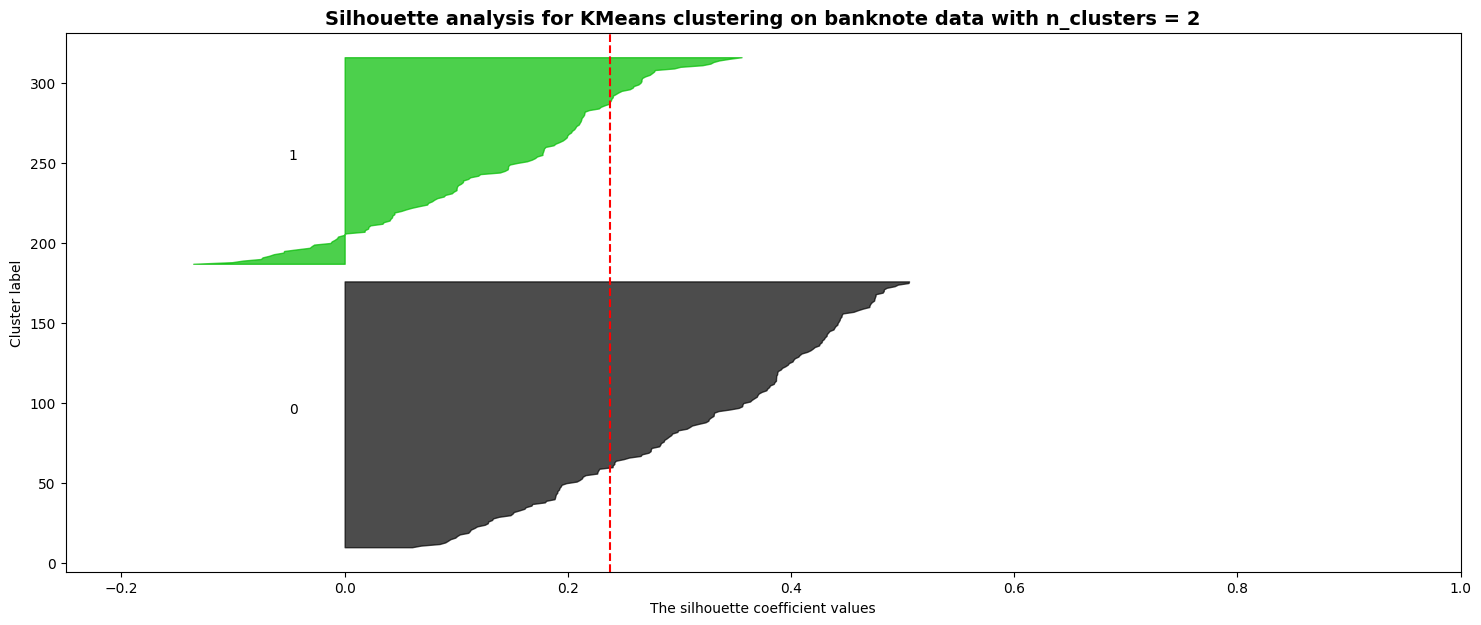

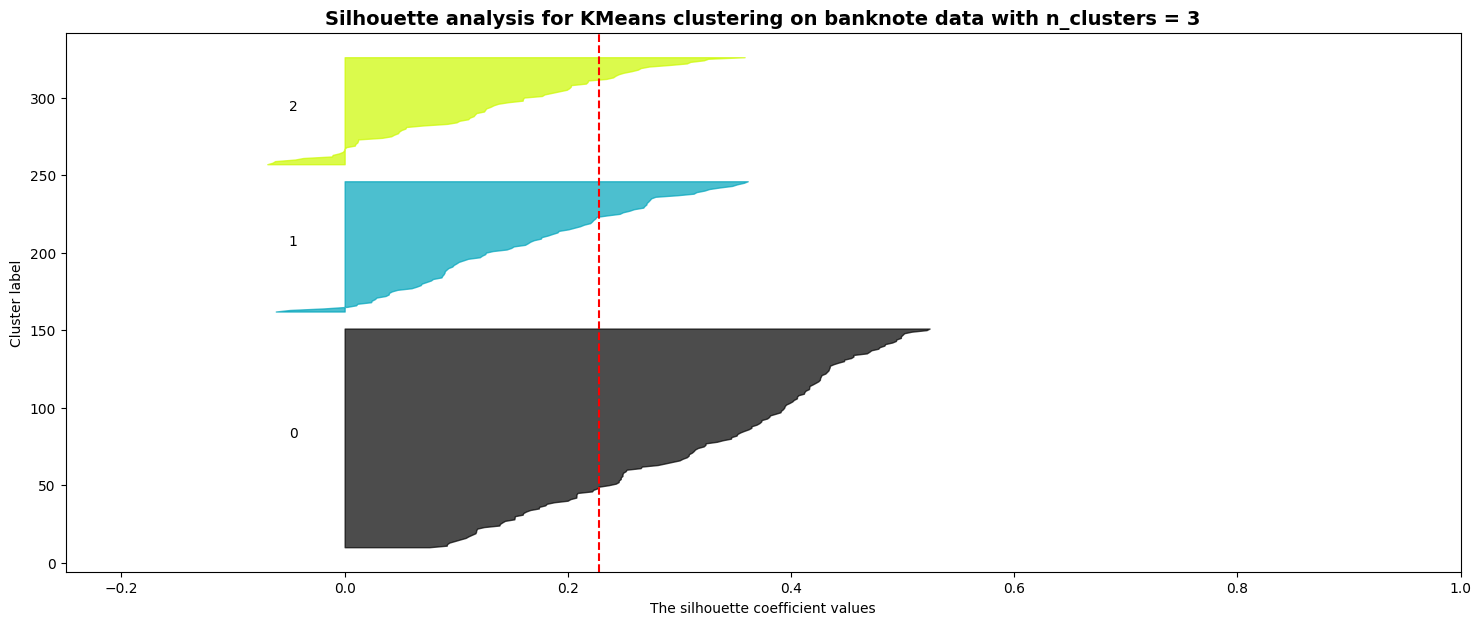

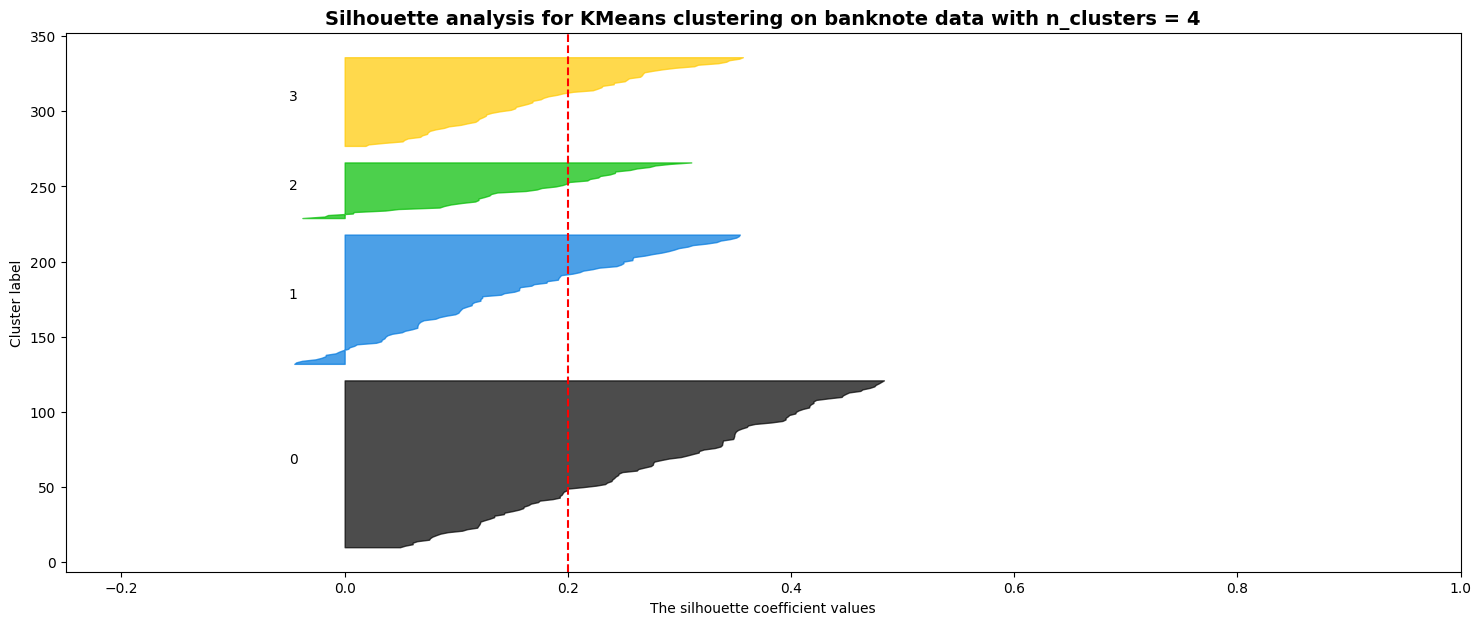

In [ ]:
#7
range_n_clusters = range(2, 5)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df[numerical_cols])
    silhouette_avg_km = silhouette_score(df[numerical_cols], cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[numerical_cols], cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on banknote data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


The best k=2 because the average silhouette score is the highest for this value of k. 

In [ ]:
pca = PCA()
pca_result = pca.fit_transform(df[numerical_cols])
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3','PC4','PC5'])

In [ ]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_[:2]))

[0.35937581 0.21941782 0.1741138  0.15313121 0.09396136]
0.5787936281800568


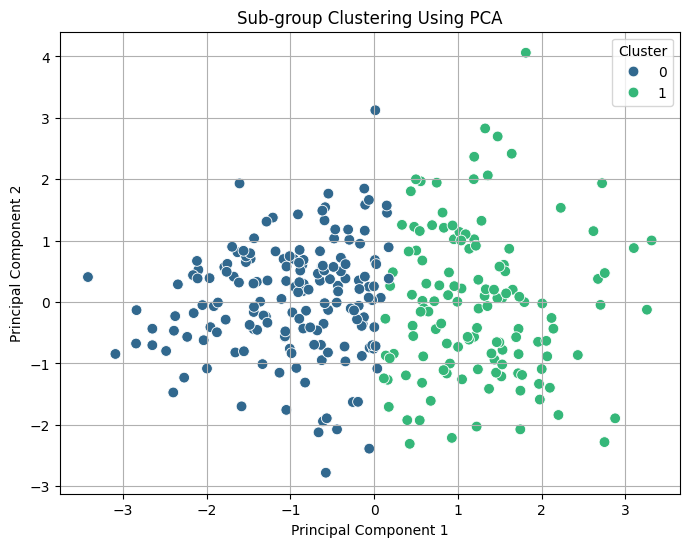

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=1)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Sub-group Clustering Using PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
#8
X = df.drop(columns='num')
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=1,
    stratify=y
)
print(len(X_train), len(X_test))

207 90


9. 
**Logistic Regression:** A linear classifier that is simple, fast, and highly interpretable (weights indicate feature influence). Logistic regression works well if the relationship between features and log-odds of the outcome is roughly linear. Given many strong risk factors (e.g., *oldpeak*, etc.), a logistic model can directly model the probability of disease. It also handles binary and continuous features (after dummy encoding) and is less prone to overfitting with fewer parameters. We also choose it for its interpretability – important in medical contexts to understand predictors.

**Random Forest:** An ensemble of decision trees that can capture non-linear interactions between features. Random forests handle heterogeneous feature types naturally and are robust to outliers. Considering our data might have non-linear effects (e.g., extremely high oldpeak might exponentially raise risk), a Random Forest can model such effects better than a linear model. It can also automatically handle feature interactions (e.g., a combination of moderate oldpeak and high chol might indicate risk even if individually moderate). Additionally, Random Forests provide feature importance estimates, which is useful for insight. Given the moderate dataset size (303), a Random Forest can be trained quickly and tends not to overfit if we constrain depth.


10. 
We should select `Accuracy` and `ROC-AUC` as evaluation metrics.

`Accuracy`: (TP + TN) / (TP + TN + FP + FN),  where TP, TN, FP, FN are true positives, true negatives, false positives, and false negatives respectively. Accuracy gives an overall success rate of the classifier. In our case, since the classes are fairly balanced, accuracy is a reasonable metric for overall performance. However, accuracy alone can be misleading if the cost of false negatives vs false positives differs (in medicine, missing a disease case might be worse than a false alarm). Thus, we include a metric sensitive to class imbalance or errors distribution.

`ROC AUC`: Area under the Receiver Operating Characteristic curve.
ROC-AUC evaluates how well the model distinguishes between the classes across all thresholds, making it robust for imbalanced or threshold-sensitive applications.

In [ ]:
m_log = LogisticRegression()
m_log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict the prob on test set
pred_prob = m_log.predict_proba(X_test)
pred_prob

array([[2.68180383e-01, 5.14702783e-01, 9.70366446e-02, 5.48871105e-02,
        6.51930793e-02],
       [1.20808288e-02, 3.16260555e-01, 5.66503807e-01, 7.58225073e-02,
        2.93323023e-02],
       [1.24549359e-01, 2.80105679e-01, 4.62612555e-01, 1.02958464e-01,
        2.97739429e-02],
       [9.88060565e-01, 1.05049939e-02, 5.59741565e-04, 8.44151099e-04,
        3.05482696e-05],
       [9.47423563e-01, 2.74829676e-02, 1.15152168e-02, 1.11228743e-02,
        2.45537853e-03],
       [8.37688309e-01, 1.20735805e-01, 1.23686758e-02, 2.44612955e-02,
        4.74591536e-03],
       [6.92769253e-01, 2.13192821e-01, 1.82870843e-02, 5.55790592e-02,
        2.01717819e-02],
       [9.64410129e-01, 2.42098344e-02, 3.58053726e-03, 5.59522255e-03,
        2.20427708e-03],
       [1.31384939e-02, 5.13533979e-01, 3.65063792e-01, 7.68886699e-02,
        3.13750648e-02],
       [9.27774509e-01, 4.64899227e-02, 1.66131380e-02, 2.54955726e-03,
        6.57287341e-03],
       [9.89099847e-01, 8.9565

In [ ]:
df_roc = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )

df_roc['y_test_pred'] = df_roc.prob1.map(lambda x: 'Yes' if x>0.35 else 'No')
df_roc['y_test_pred'] = m_log.predict(X_test)
cm = confusion_matrix(df_roc.y_test, df_roc.y_test_pred)

total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) 
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.5333333333333333
Sensitivity :  0.3333333333333333
Specificity :  0.9361702127659575


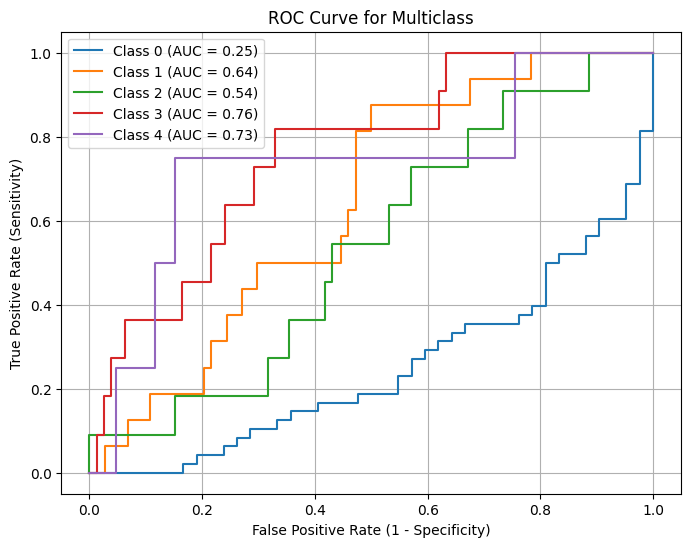

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(df_roc.y_test.unique())
y_test_binarized = label_binarize(df_roc.y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	fpr, tpr, _ = roc_curve(y_test_binarized[:, i], df_roc.prob1)
	auc_score = roc_auc_score(y_test_binarized[:, i], df_roc.prob1)
	plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Multiclass')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ensure that df_encoded_clean, X_train, and y_train are defined before training final models
if 'data_removed' not in globals():
	data_removed = data_removed.dropna()

if 'X_train' not in globals() or 'y_train' not in globals():
	X = data_removed.drop('target', axis=1)
	y = data_removed['target']
	X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size=0.3, random_state=1, stratify=y)

# Train final models with best params
best_lr = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', random_state=1)
best_lr.fit(X_train, y_train)

best_rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
# 12.

# Select top 5 features from X_train
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_cols = X_train.columns[selector.get_support()]
print("Selected top 5 features:", list(selected_cols))

# Train logistic regression on selected features (tune C as well)
param_grid_sel = {'C': [0.1, 1, 10]}
grid_lr_sel = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear', random_state=1),
                           param_grid_sel, cv=5, scoring='f1')
grid_lr_sel.fit(X_train_sel, y_train)
print("Best params for LR (selected features):", grid_lr_sel.best_params_)
best_lr_sel = grid_lr_sel.best_estimator_


Selected top 5 features: ['thalach', 'cp_3', 'cp_4', 'exang_1', 'thal_7.0']
Best params for LR (selected features): {'C': 0.1}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^

In [ ]:
# 13.
from sklearn.metrics import accuracy_score, f1_score
# Predictions on the test set
y_pred_lr   = best_lr.predict(X_test)
y_pred_rf   = best_rf.predict(X_test)
y_pred_sel  = best_lr_sel.predict(X_test_sel)

# Compute accuracy and F1 for each
acc_lr  = accuracy_score(y_test, y_pred_lr)
f1_lr   = f1_score(y_test, y_pred_lr, average='macro')
acc_rf  = accuracy_score(y_test, y_pred_rf)
f1_rf   = f1_score(y_test, y_pred_rf, average='macro')
acc_sel = accuracy_score(y_test, y_pred_sel)
f1_sel  = f1_score(y_test, y_pred_sel, average='macro')

print(f"Logistic (all features) - Accuracy: {acc_lr:.3f}, F1: {f1_lr:.3f}")
print(f"Random Forest (all features) - Accuracy: {acc_rf:.3f}, F1: {f1_rf:.3f}")
print(f"Logistic (top 5 features) - Accuracy: {acc_sel:.3f}, F1: {f1_sel:.3f}")


Logistic (all features) - Accuracy: 0.600, F1: 0.313
Random Forest (all features) - Accuracy: 0.578, F1: 0.240
Logistic (top 5 features) - Accuracy: 0.600, F1: 0.285
